# Project: Estimating property value, dataset from 'zillow' database

## Project Goal

### To find a regression model that can predict the value of a single family property with a much higher accuracy than the baseline prediction.

In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats imports
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind


#custom modules
import wrangle as w

#remove pink warning box
import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire, validate, & test
train,validate,test=w.wrangle_zillow_split()


       train  ----> (1284141, 7)
    validate  ----> (428047, 7)
        test  ----> (428047, 7)


In [3]:
train.sample(4)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
575189,6,8.0,8871,4115170,2013,45943.57,LA
519251,4,2.0,1118,62410,1954,1520.66,LA
1826204,4,4.0,3442,671377,1994,11749.74,LA
609634,3,2.0,1458,362239,1955,4393.88,LA


In [4]:
def plot_variable_pairs(df):
    
    # reg = regression line (or best fitting line)
    sns.pairplot(df,
                 diag_kws={'color':'green'},
                 kind='reg',
                 plot_kws={'line_kws':{'color': 'red'}},
                 corner=True
                )
    
    plt.show()
    

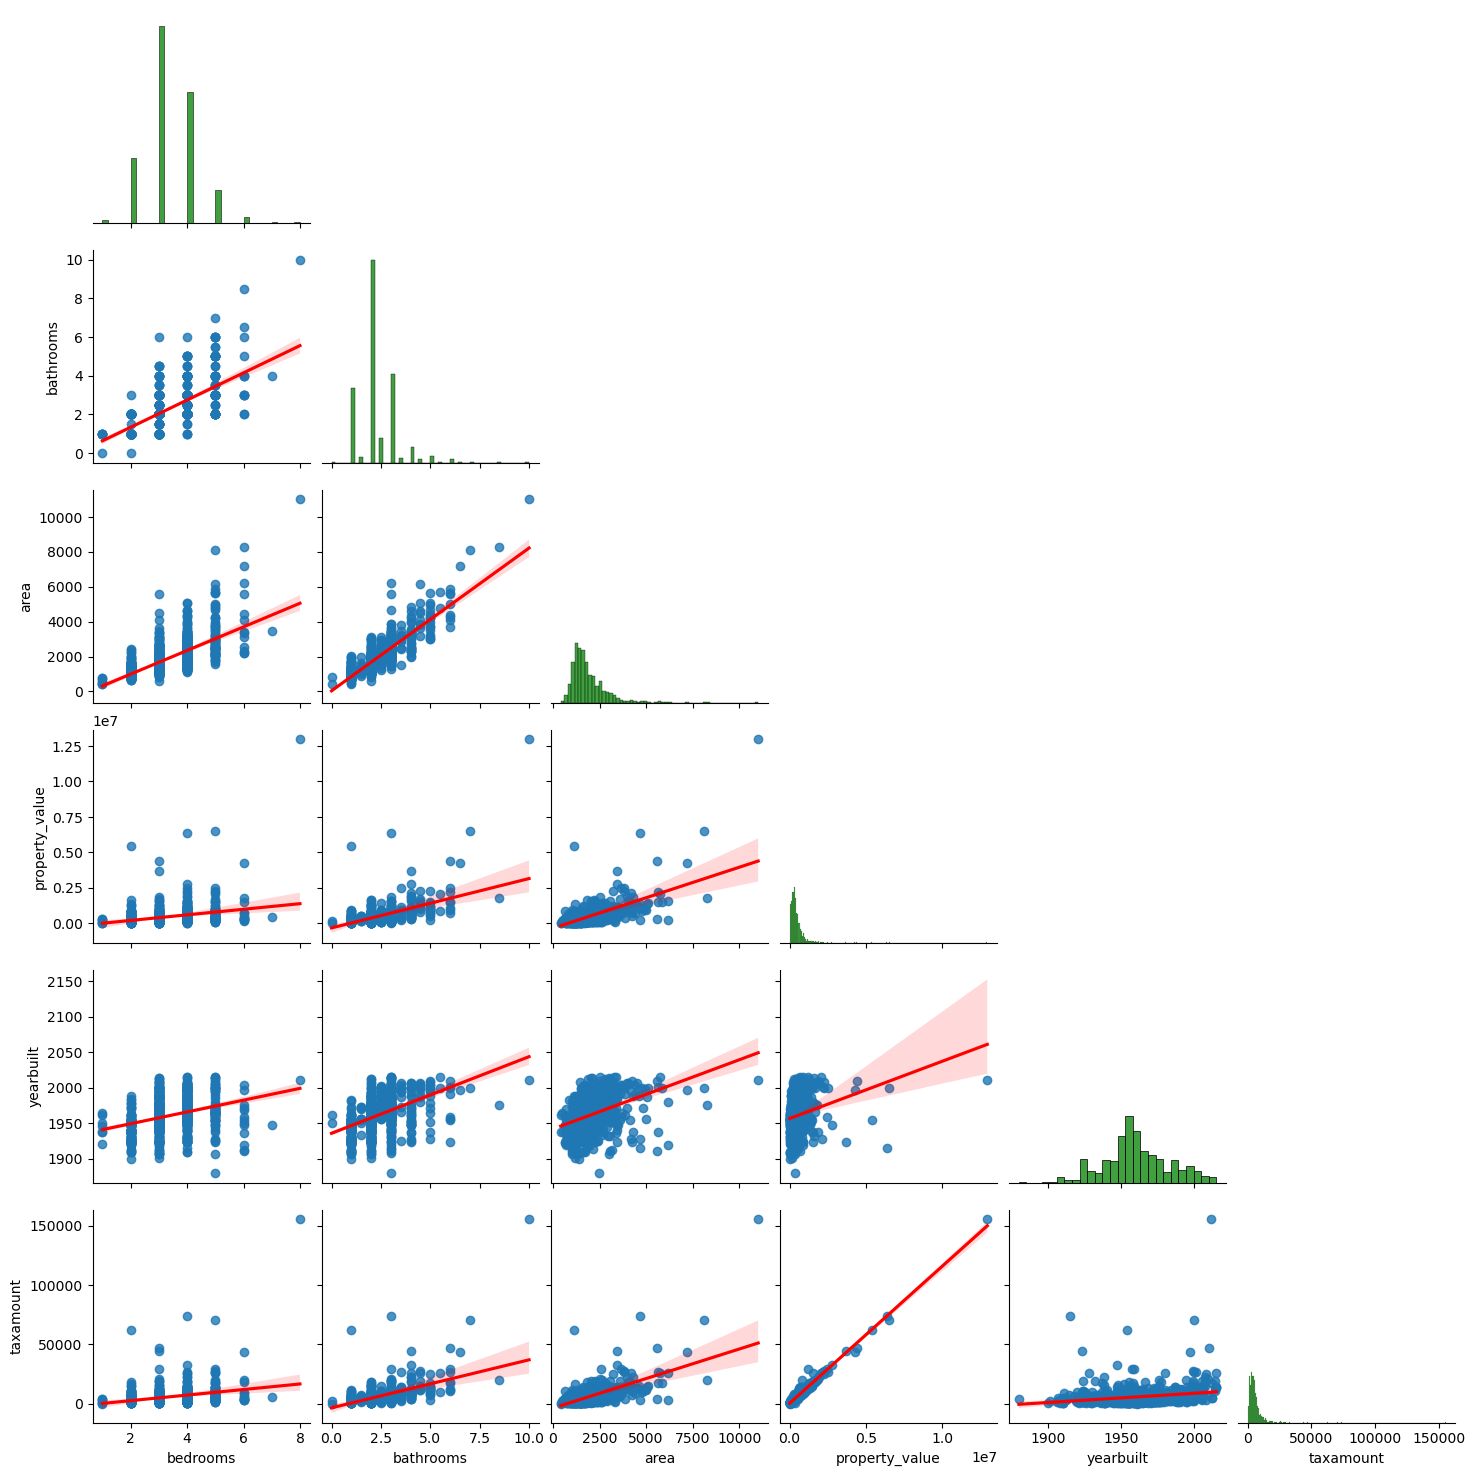

In [5]:
plot_variable_pairs(train.sample(1000))

In [6]:
cat_col = []
con_col = []

#looping through all columns
for col in train.columns:
        #finding all my categorical columns by checking for how many unique values
        # if less than 100, append to cat_col
        if train[col].dtype== 'object':
            cat_col.append(col)
        else: 
            #if it has more than 100 unique values, append to continous column variable
            con_col.append(col)

In [7]:
cat_col

['county']

In [8]:
con_col

['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt', 'taxamount']

In [9]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    
    
    for i in categorical_var:
        
        for j in continuous_var:
        
            plt.figure(figsize=(15, 8))
            # Plotting boxplot
            plt.subplot(1, 4, 1)
            sns.boxplot(x=i, y=j, data=df)
            plt.title('Boxplot')

            # Plotting bar plot
            plt.subplot(1, 4, 2)
            sns.barplot(x=i, y=j, data=df)
            plt.title('bar Plot')

            # Plotting scatter plot (for smaller datasets)
            plt.subplot(1, 4, 3)
            sns.scatterplot(x=i, y=j, data=df)
            plt.title('scatter Plot')
            
            # Plotting swarm plot (for smaller datasets)
            plt.subplot(1, 4, 4)
            sns.swarmplot(x=i, y=j, data=df)
            plt.title('swarm Plot')
            
            # Plotting strip plot (for smaller datasets)
            # plt.subplot(2, 2, 5)
            # sns.stripplot(x=i, y=j, data=df)
            # plt.title('strip Plot')
            

            plt.tight_layout()
            plt.show()

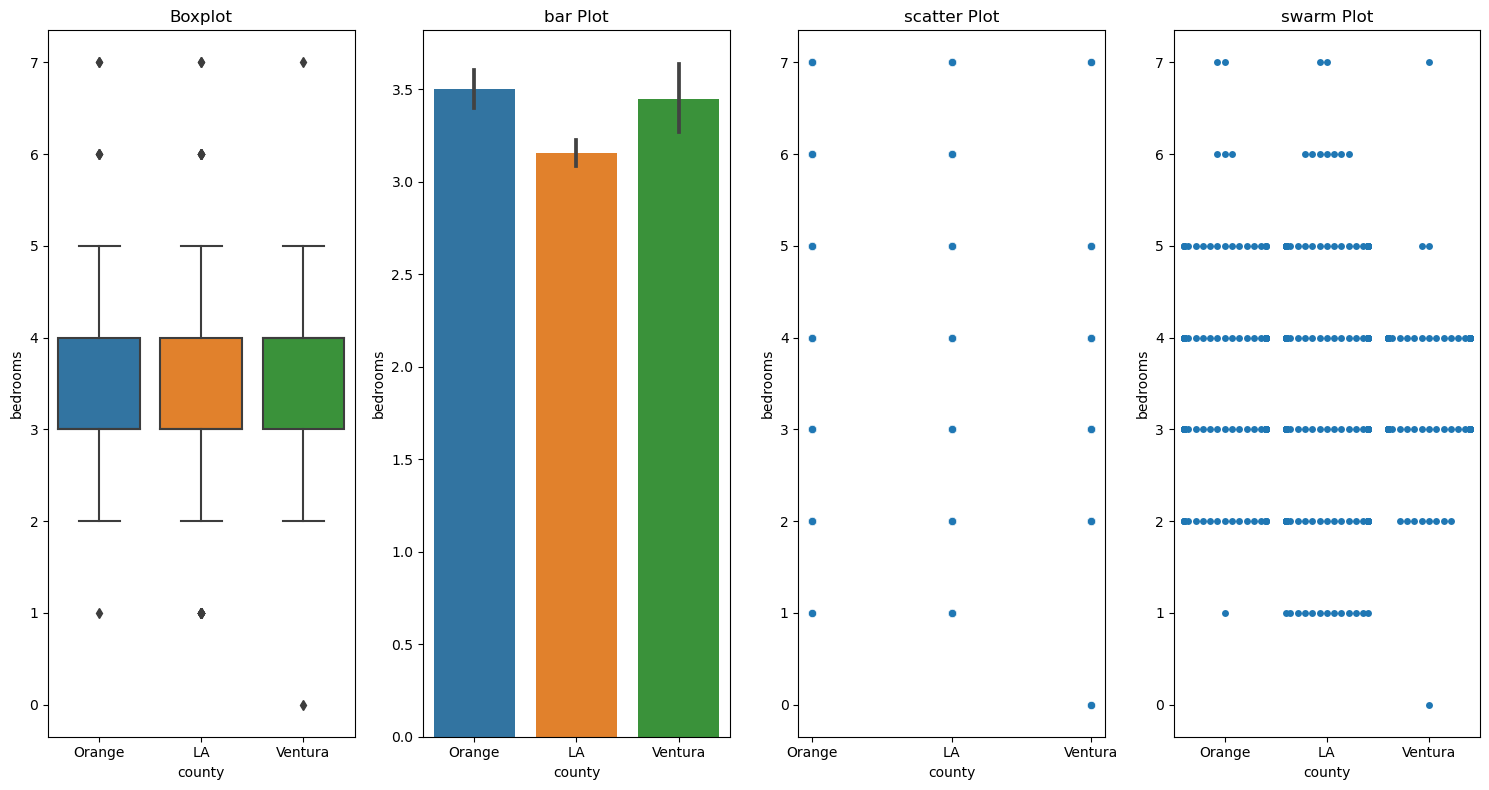

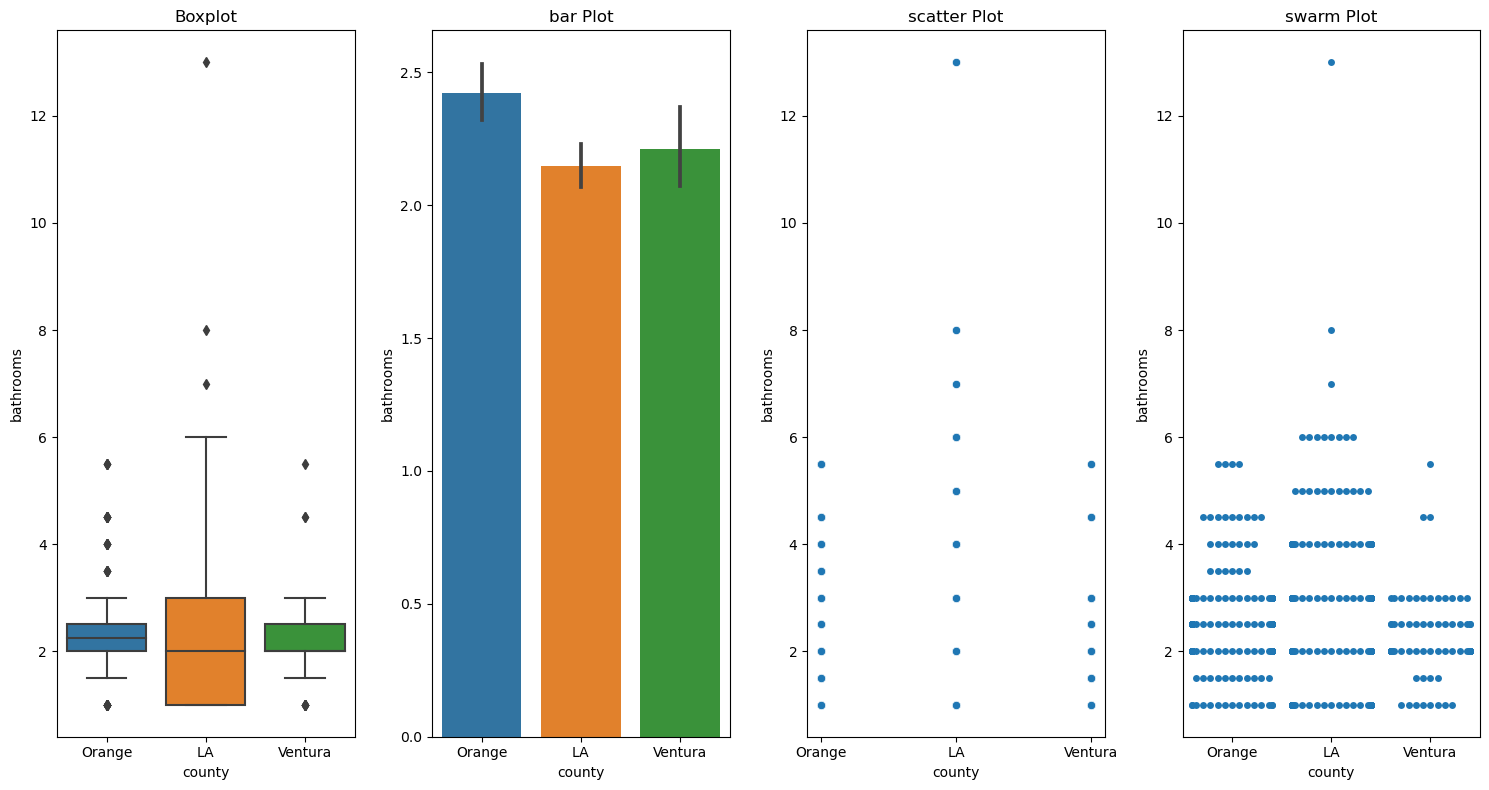

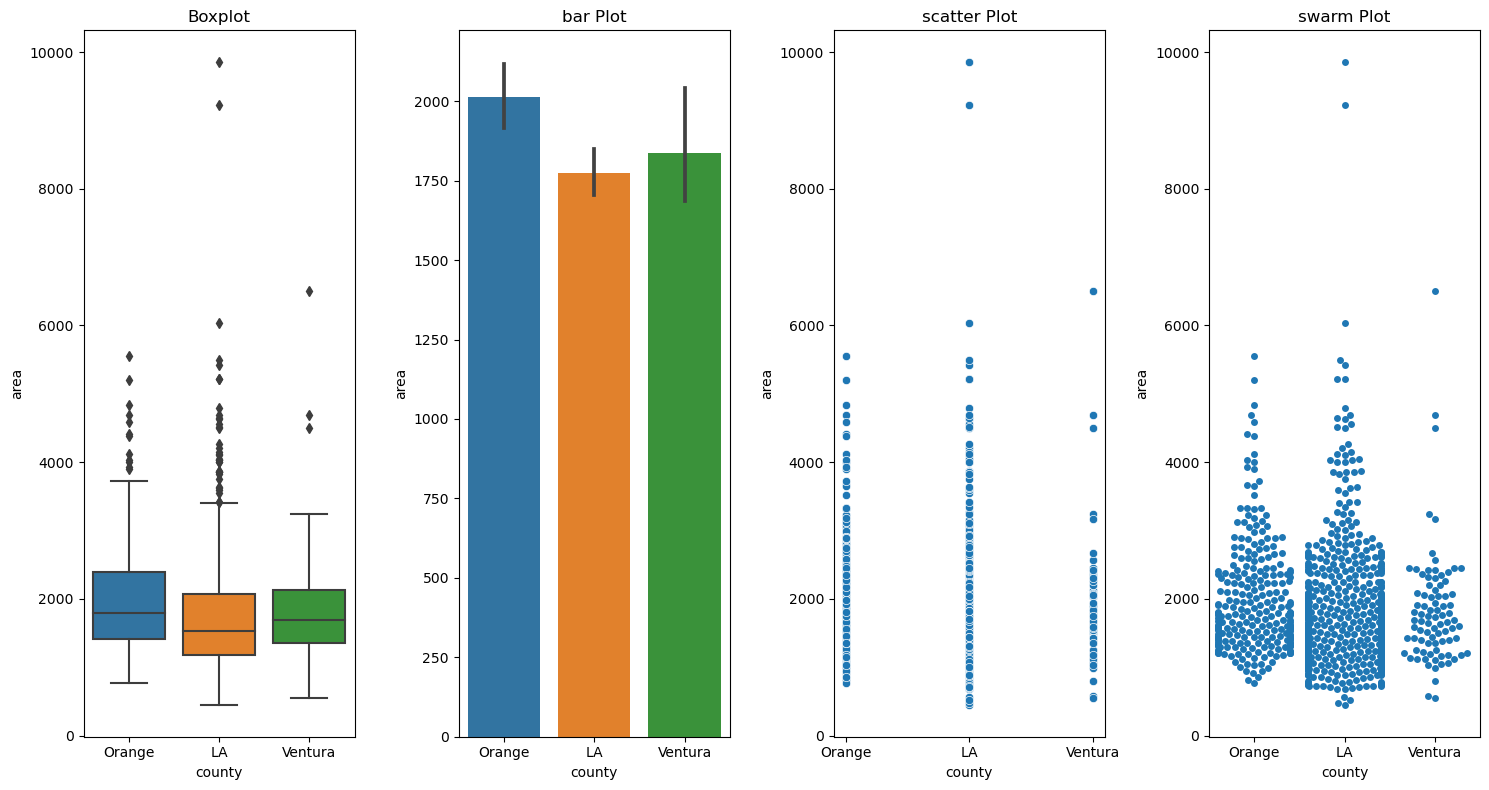

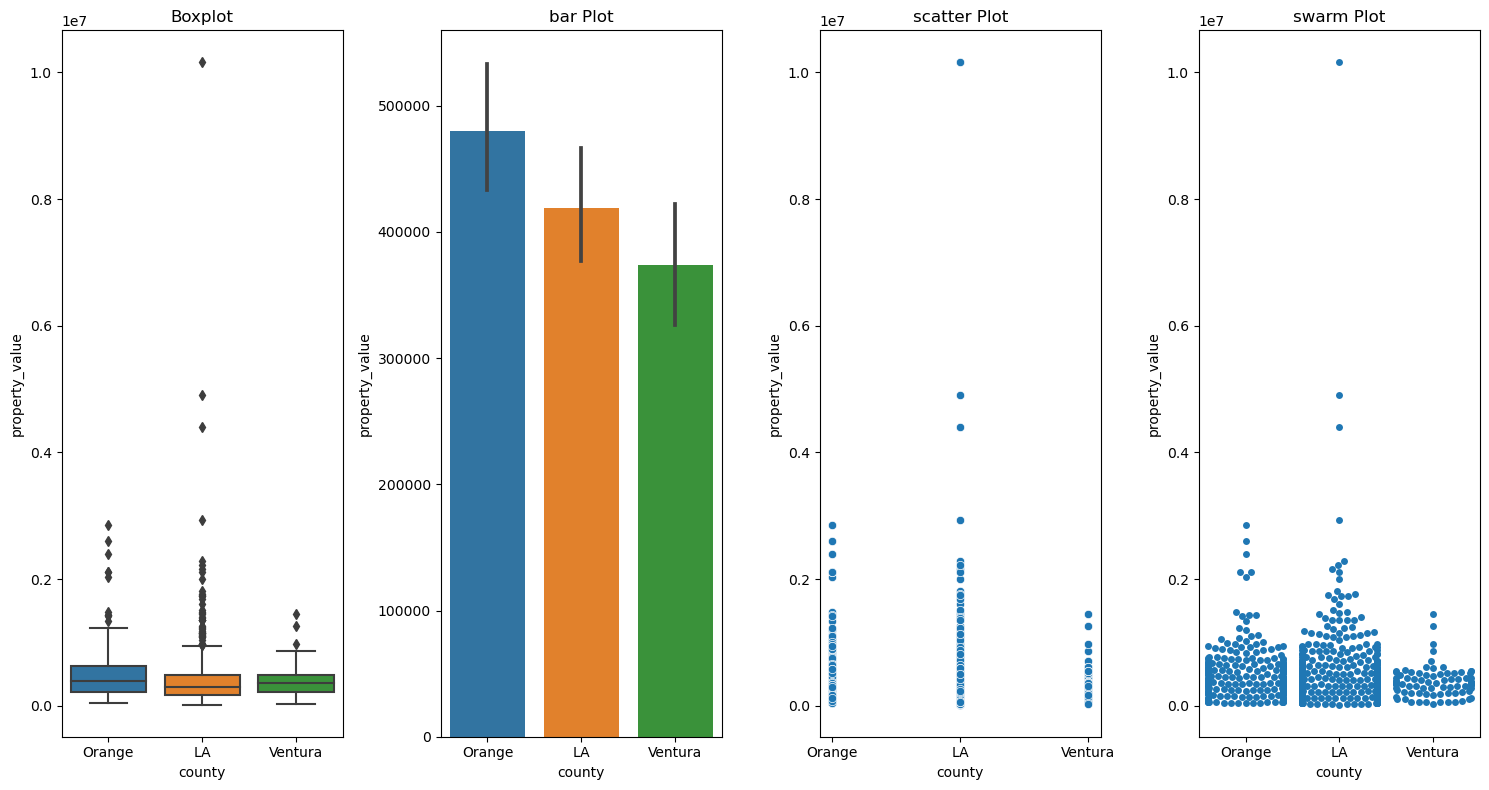

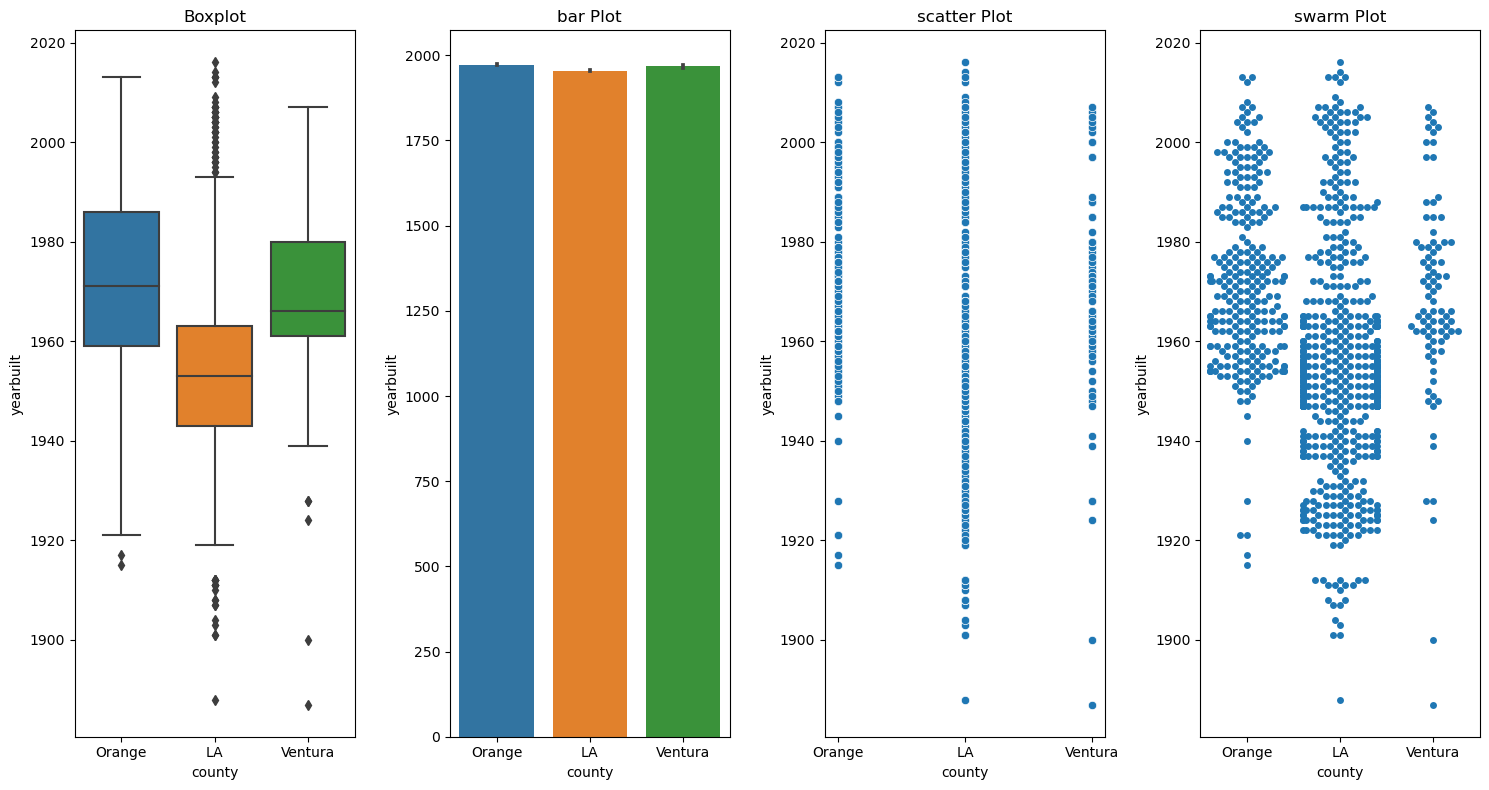

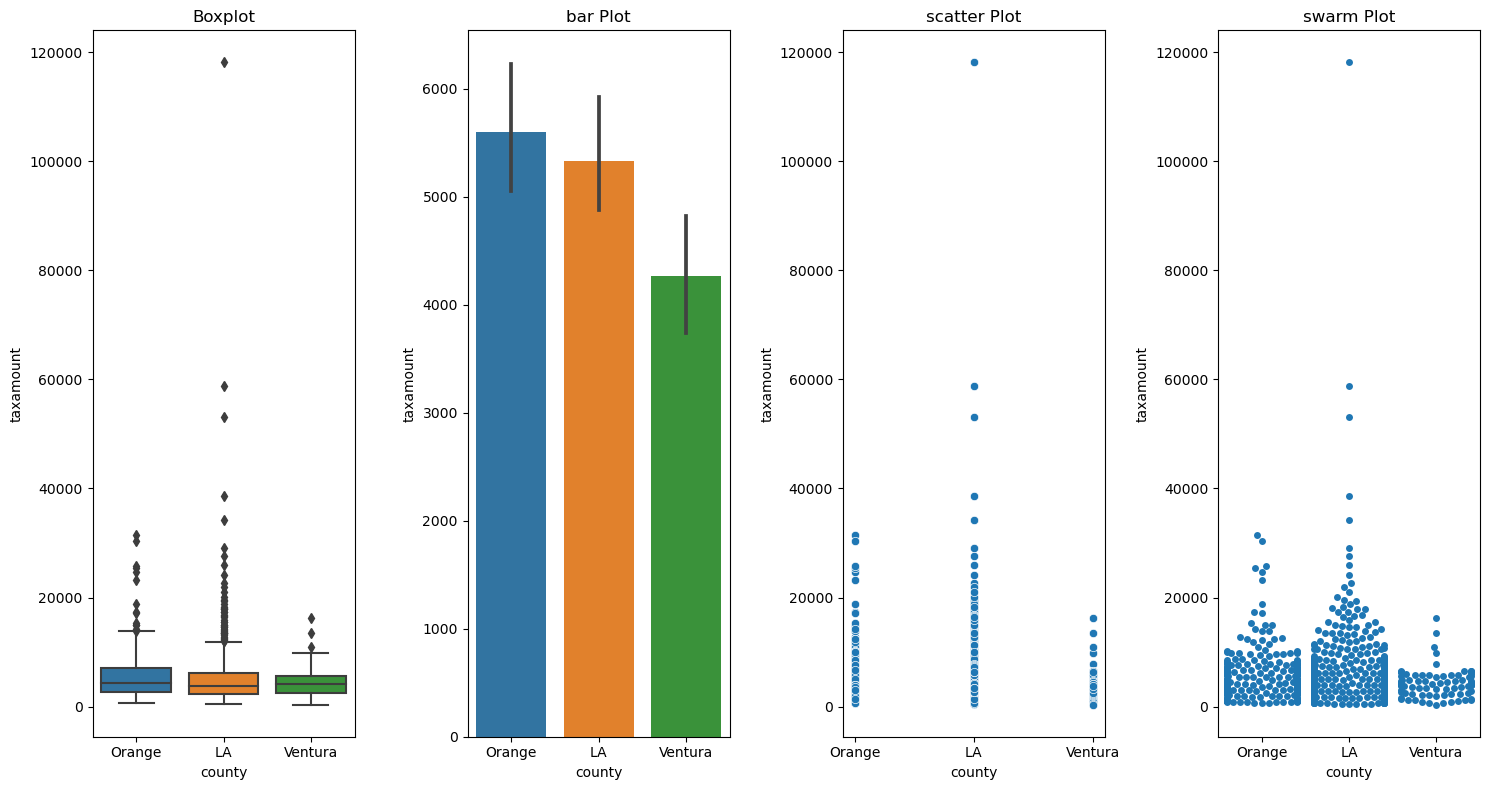

In [10]:
plot_categorical_and_continuous_vars(train.sample(1000),cat_col,con_col)

<div class='alert alert-block alert-info'>

# HYPOTHESIS
    
</div>


<div class='alert alert-block alert-success'>

<h1>
HQ1) Is there a relationship between taxamount and property_value?

level of significance (alpha) =0.05
</h1>

</div>

## visualize

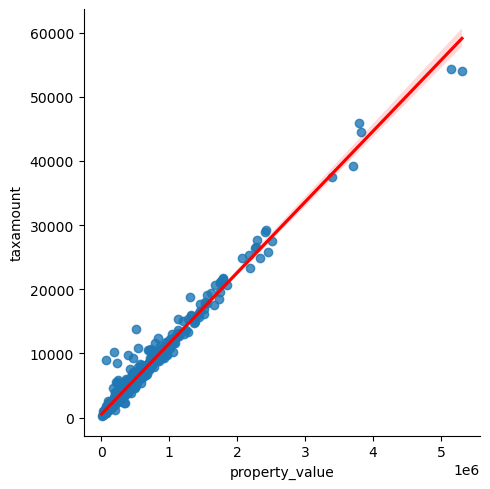

In [11]:
sns.lmplot(data=train.sample(1000), x='property_value', y='taxamount',line_kws={'color':'red'})
plt.show()

In [12]:
# for normality check
sha_stat, p_val = stats.shapiro(train.property_value)
sha_stat, p_val

(0.3887781500816345, 0.0)

Since p_value < alpha, so we reject Ho, so  property_value is not normally distributed.
so we have to use 'spearmann's R' test between two continuous variables 'propery_value' and 'taxamount'.

## Analyze

Ho: There is no linear correlation between taxamount and property_value

Ha: There is a linear correlation between taxamount and property_value

alpha=0.05

In [13]:
r,p=stats.spearmanr(train.property_value,train.taxamount)
r,p

(0.9785359758073235, 0.0)

Since p < alpha, so we reject Ho. This conclude there is a linear correlation between property_value and taxamount

<h1>
<div class='alert alert-block alert-success'>
HQ2) Does property value differ on the based of county?

Ho: There are no significant differences among the groups.

Ha: There are significant differences among the groups.

alpha=0.05
<h1>
</div>

In [14]:
train.county.value_counts()

county
LA         855167
Orange     331090
Ventura     97884
Name: count, dtype: int64

In [15]:
la_prop=train[train.county=='LA'].property_value
orange_prop=train[train.county=='Orange'].property_value
ventura_prop=train[train.county=='Ventura'].property_value

Text(0.5, 1.0, 'Boxplot')

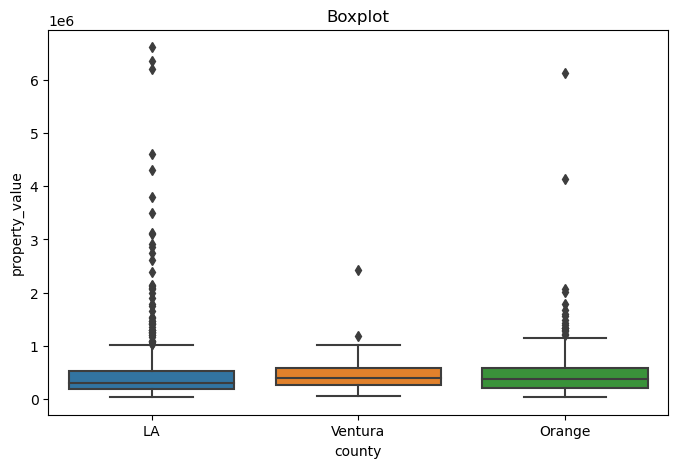

In [16]:
# visulize
plt.figure(figsize=(8,5))
# Plotting boxplot

sns.boxplot(x='county', y='property_value', data=train.sample(1000))
plt.title('Boxplot')


In [17]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(la_prop,orange_prop,ventura_prop)
f_stat,p_value

(1981.9072001847737, 0.0)

In [18]:
# Interpret results
alpha = 0.05  # Your chosen significance level
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: There are significant differences among the groups.")
else:
    print("Fail to reject null hypothesis: There might not be significant differences among the groups.")

F-statistic: 1981.9072001847737
P-value: 0.0
Reject null hypothesis: There are significant differences among the groups.


<div class='alert alert-block alert-success'>

# HQ3) Does decadebuild affects the 'property_value' home value ?    

</div>

In [19]:
train.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,5,4.0,3011,710674,2005,7561.14,Ventura
3880,3,2.0,1682,603333,1961,7086.19,LA
992263,4,2.0,1433,82804,1954,1134.83,LA


In [20]:
train['yearbuilt'].value_counts().sort_index()

yearbuilt
1801       2
1807       1
1823       1
1833       1
1840       1
        ... 
2012    2052
2013    2820
2014    2821
2015    2120
2016      58
Name: count, Length: 149, dtype: int64

<Axes: xlabel='yearbuilt', ylabel='property_value'>

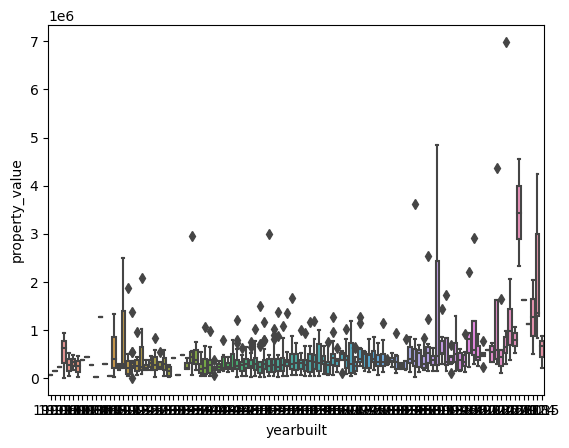

In [21]:
sns.boxplot(x='yearbuilt', y='property_value', data=train.sample(1000))

### Analyze

comparing 'yearbuilt' to 'porperty_value' because we are going to bin tenure into 2xdecade, of which the highest year is 2016 and lowest year is 1801.so i will get 11 categorical decade built.

* Ho: There is no relationship between decade built and home value.

* Ha: There is relationship between decade built and home value.

* alpha=0.05


In [22]:
# Create bins for 'yearbuilt' in terms of 2xdecade
# year 1800 - 1899 all put into one single bin
# bins = [1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,2020]  
bins = [1800, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
# Create labels for the bins (representing years)
# labels = ['1800s', '1820s', '1840s', '1860s', '1880s', '1900s', '1920s','1940s','1960s','1980s','2000s']
labels = ['1800s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', 
          '1990s', '2000s','2010s']
# Bin the 'yearbuilt' column
# eg:==> right == True (the default), then the bins=[1, 2, 3, 4] indicate (1,2], (2,3], (3,4]

train['decade_built'] = pd.cut(train['yearbuilt'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'tenure_years' column
print(train[['yearbuilt', 'decade_built']])

         yearbuilt decade_built
462820        2005        2000s
3880          1961        1960s
992263        1954        1950s
311722        1999        2000s
787985        1962        1960s
...            ...          ...
1966409       1963        1960s
1248263       1979        1980s
28211         1965        1960s
279547        2001        2000s
778196        1939        1940s

[1284141 rows x 2 columns]


In [23]:
train.head(4)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,decade_built
462820,5,4.0,3011,710674,2005,7561.14,Ventura,2000s
3880,3,2.0,1682,603333,1961,7086.19,LA,1960s
992263,4,2.0,1433,82804,1954,1134.83,LA,1950s
311722,3,2.5,2001,355444,1999,4174.92,Ventura,2000s


In [24]:
train.decade_built.value_counts().sort_index()

decade_built
1800s      1416
1900s      9292
1910s     20240
1920s     87677
1930s     46905
1940s    137176
1950s    344085
1960s    219613
1970s    150040
1980s     99237
1990s     81634
2000s     71775
2010s     15051
Name: count, dtype: int64

In [25]:
train.decade_built.unique

<bound method Series.unique of 462820     2000s
3880       1960s
992263     1950s
311722     2000s
787985     1960s
           ...  
1966409    1960s
1248263    1980s
28211      1960s
279547     2000s
778196     1940s
Name: decade_built, Length: 1284141, dtype: category
Categories (13, object): ['1800s' < '1900s' < '1910s' < '1920s' ... '1980s' < '1990s' < '2000s' < '2010s']>

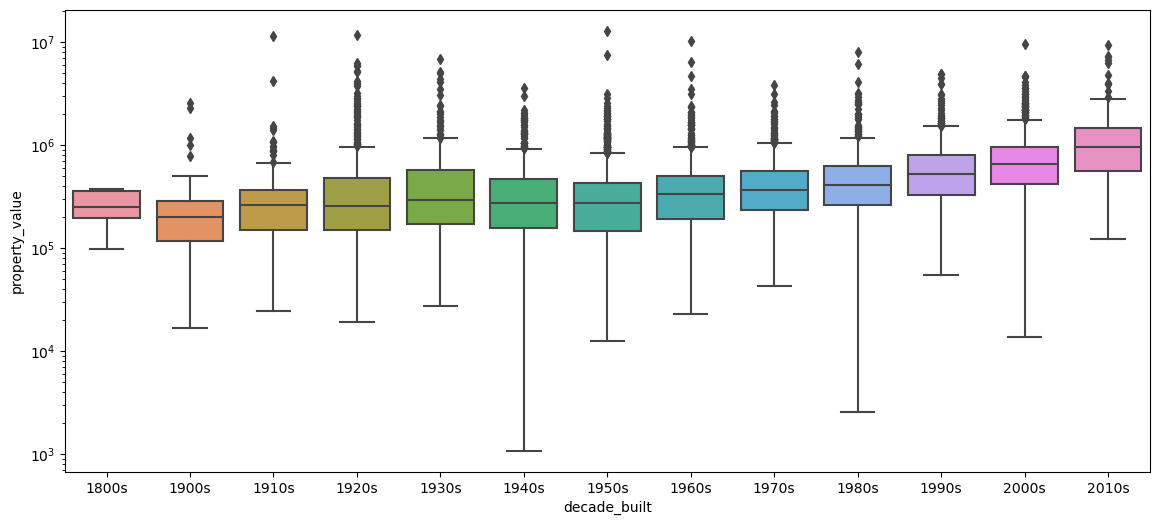

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(x='decade_built', y='property_value', data=train.sample(8000))
plt.yscale('log')  # Use a logarithmic scale for better readability
plt.show()

In [27]:
# Sort decades
decades = sorted(train['decade_built'].unique())

# Create a list to store the property values for each decade
property_values_by_decade = []

# Select property value for each decade and append to the list
for d in decades:
    prop_by_decades = train[train['decade_built'] == d]['property_value']
    property_values_by_decade.append(prop_by_decades)

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*property_values_by_decade)

# Print ANOVA results
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 7677.474379461568
ANOVA p-value: 0.0


In [28]:
# Interpret results
alpha = 0.05  # Your chosen significance level
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: There are significant differences among the groups.")
else:
    print("Fail to reject null hypothesis: There might not be significant differences among the groups.")

F-statistic: 7677.474379461568
P-value: 0.0
Reject null hypothesis: There are significant differences among the groups.


<div class='alert alert-block alert-success'>

## HQ4) Is there a relationship between 'area' and 'property_value' ?
    
</div>


In [29]:
train.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,decade_built
462820,5,4.0,3011,710674,2005,7561.14,Ventura,2000s
3880,3,2.0,1682,603333,1961,7086.19,LA,1960s
992263,4,2.0,1433,82804,1954,1134.83,LA,1950s


## Visualize (continuous vs continuous)

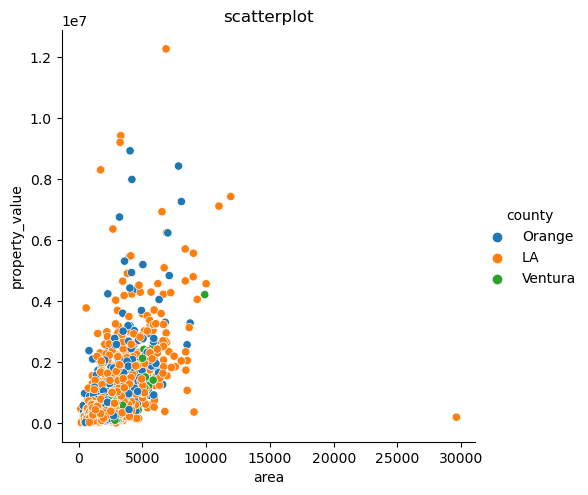

In [30]:
# Plotting scatterplot
sns.relplot(x='area', y='property_value', data=train.sample(10000), kind='scatter',hue='county')
plt.title('scatterplot')
plt.show();


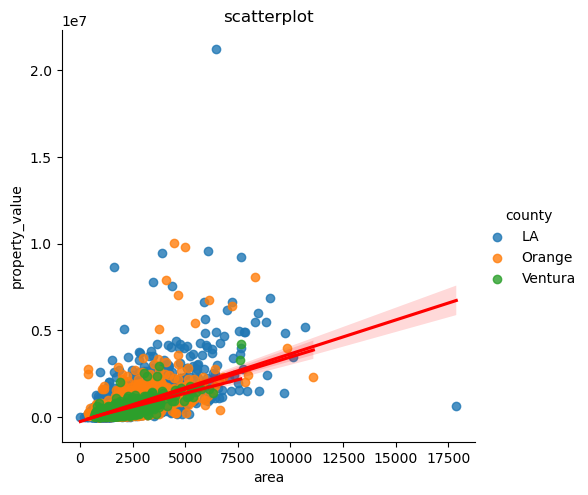

In [31]:
# Plotting scatterplot with regression line
sns.lmplot(x='area', y='property_value', data=train.sample(10000),line_kws={'color': 'red',},hue='county')
plt.title('scatterplot')
plt.show();


## Analyze

Ho: There is no linear correlation between area and property_value

Ha: There is a linear correlation between area and Property_value

In [32]:
# for normality check
sha_stat, p_val = stats.shapiro(train.property_value)
sha_stat, p_val

(0.3887781500816345, 0.0)

Since p_val < alpha, so we reject Ho, so property_value is not normally distributed. so we have to use 'spearmann's R' test between two continuous variables 'propery_value' and 'area'.

In [33]:
# using scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.area, train.property_value)
r,p

(0.5236338961752631, 0.0)

In [34]:
def eval_Spearman(r, p, alpha=0.05):
    if p < alpha:
        return print(f"""We reject Ho, there is relationship.
        Spearman’s r: {r:2f}P-value: {p}""")
    else:
        return print(f"""We fail to reject Ho: that there is no relationship.
                                                Spearman’s r: {r:2f}

                                                P-value: {p}""")


In [35]:
eval_Spearman(r,p,alpha=0.05)

We reject Ho, there is relationship.
        Spearman’s r: 0.523634P-value: 0.0


### Takeaways:

The SpearmanR test shows there is a monotonic relationship between 'area' and 'area'.
There seems to be a great correlation between 'area' and 'property_value', as 'area' increases, 'property_value' also increases. Which makes sense as the larger the constructed house, the more material it takes to be built, therefore more expensive.


<div class='alert alert-block alert-success'>

## HQ5) Is there a relationship between 'bedrooms' and 'property_value' ?
    
</div>


## Visualize (continuous vs continuous)

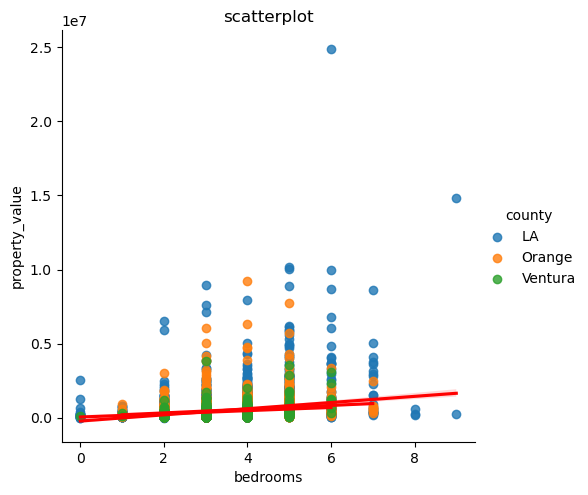

In [36]:
# Plotting scatterplot with regression line
sns.lmplot(x='bedrooms', y='property_value', data=train.sample(10000),line_kws={'color': 'red',},hue='county')
plt.title('scatterplot')
plt.show();


## Analyze

Ho: There is no linear correlation between bedrooms and property_value

Ha: There is a linear correlation between bedrooms and Property_value

In [37]:
# for non-parametric test
# using scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.bedrooms, train.property_value)
r,p

(0.29525017456958363, 0.0)

In [38]:
eval_Spearman(r,p,alpha=0.05)

We reject Ho, there is relationship.
        Spearman’s r: 0.295250P-value: 0.0


### Takeaways:

The SpearmanR test shows there is a relationship between 'bedrooms' and 'property_value'.
There seems to be a great correlation between 'bedrooms' and 'property_value', as the number of bedrooms increases (up to 5) the value increases, after 5, the 'property_value' is less reflected on number of bedrooms.

<div class='alert alert-block alert-success'>

# Modeling
</div>

* I Will scale all continious features for modeling and dummify on the categorical feature.

* I will find a baseline by taking the mean of 'property_value'.

* I will be using the following models to evaluate:

    1) baseline model
   
    2) Ordinary Least Squares
    
            2.1) simple linear regression
            
            2.2) multiple linear regression
    
    3) LassoLars
    
    4) Polynomial Regression
    
    5) GLM

In [39]:
train.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,decade_built
462820,5,4.0,3011,710674,2005,7561.14,Ventura,2000s
3880,3,2.0,1682,603333,1961,7086.19,LA,1960s
992263,4,2.0,1433,82804,1954,1134.83,LA,1950s


In [40]:
validate.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
553175,5,4.0,3896,2749023,1924,33112.84,LA
334836,4,3.0,1962,376865,1959,4774.05,LA
835173,4,2.0,2000,708000,1967,8734.68,LA


In [41]:
train=train.drop(columns='decade_built')

In [42]:
def X_y_split(train,validate,test,target):
    '''
    This function takes in a dataframe and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    '''  
    

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print()
    print(f'X_train -> {X_train.shape}')
    print(f'y_train -> {y_train.shape}')
    print()
    print(f'X_validate -> {X_validate.shape}')
    print(f'y_validate -> {y_validate.shape}')
    print()      
    print(f'X_test -> {X_test.shape}')  
    print(f'y_validate -> {y_test.shape}')
          
    return X_train, y_train, X_validate, y_validate, X_test, y_test
    

In [43]:
X_train, y_train, X_validate, y_validate, X_test, y_test= X_y_split(train,validate,test,'property_value')


X_train -> (1284141, 6)
y_train -> (1284141,)

X_validate -> (428047, 6)
y_validate -> (428047,)

X_test -> (428047, 6)
y_validate -> (428047,)


In [44]:
X_train.head(3)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county
462820,5,4.0,3011,2005,7561.14,Ventura
3880,3,2.0,1682,1961,7086.19,LA
992263,4,2.0,1433,1954,1134.83,LA


In [45]:
y_train.head(3)

462820    710674
3880      603333
992263     82804
Name: property_value, dtype: int64

In [46]:
# Create a function that groups our data by datatype
def discrete_cols(df):
    cat_cols= df.select_dtypes(include=['object']).columns.tolist()
    return cat_cols

def continuous_cols(df):
    con_cols= df.select_dtypes(exclude=['object']).columns.tolist()
    return con_cols

In [47]:
cat_cols=discrete_cols(X_train)
cat_cols

['county']

In [48]:
con_cols=continuous_cols(X_train)
con_cols

['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount']

## Dummification

In [49]:
#Create dummy columns for train of categorical features
X_train = pd.get_dummies(columns=cat_cols, data=X_train,drop_first=True).astype(int)
X_train.head(3)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county_Orange,county_Ventura
462820,5,4,3011,2005,7561,0,1
3880,3,2,1682,1961,7086,0,0
992263,4,2,1433,1954,1134,0,0


In [50]:
#Create dummy columns for validate of categorical features
X_validate = pd.get_dummies(columns=cat_cols, data=X_validate,drop_first=True).astype(int)
X_validate.head(3)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county_Orange,county_Ventura
553175,5,4,3896,1924,33112,0,0
334836,4,3,1962,1959,4774,0,0
835173,4,2,2000,1967,8734,0,0


In [51]:
#Create dummy columns for test of categorical features
X_test = pd.get_dummies(columns=cat_cols, data=X_test,drop_first=True).astype(int)
X_test.head(3)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county_Orange,county_Ventura
1656157,4,2,1892,1959,1565,1,0
1948549,2,1,1411,1950,876,0,1
1691317,3,2,1196,1953,10431,0,0


## Scaling

In [52]:
# sklearn for split & scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# sklearn for feature selection 
from sklearn.feature_selection import SelectKBest, RFE,\
                                    f_regression, SequentialFeatureSelector

# sklearn for modeling 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# sklearn for evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


In [53]:
# create & fit an object
scaler=MinMaxScaler().fit(X_train[con_cols])

# transform for train
X_train[con_cols]=scaler.transform(X_train[con_cols])


# transform for validate
X_validate[con_cols]=scaler.transform(X_validate[con_cols])

# transform for test
X_test[con_cols]=scaler.transform(X_test[con_cols])


In [54]:
X_train.head(2)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county_Orange,county_Ventura
462820,0.277778,0.1250,0.005667,0.948837,0.007001,0,1
3880,0.166667,0.0625,0.003165,0.744186,0.006561,0,0


In [55]:
X_validate.head(2)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county_Orange,county_Ventura
553175,0.277778,0.12500,0.007334,0.572093,0.030702,0,0
334836,0.222222,0.09375,0.003692,0.734884,0.004416,0,0


In [56]:
X_test.head(2)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county_Orange,county_Ventura
1656157,0.222222,0.06250,0.003560,0.734884,0.00144,1,0
1948549,0.111111,0.03125,0.002655,0.693023,0.00080,0,1


## 1. baseline model & evaluate

In [57]:
# baseline is taken from train
baseline_mean=y_train.mean()
baseline_mean

460846.25053635077

In [58]:
y_train_df = pd.DataFrame(
                                {
                                   'y_act': y_train.values,
                                   'baseline_mean' : baseline_mean
                                   
                               })
y_train_df.head(3)


,y_act,baseline_mean
0,710674,460846.250536
1,603333,460846.250536
2,82804,460846.250536


In [59]:
y_validate_df=pd.DataFrame(
                                {
                                   'y_act': y_validate.values,
                                   'baseline_mean' : baseline_mean
                                   
                               })
y_validate_df.head(3)

,y_act,baseline_mean
0,2749023,460846.250536
1,376865,460846.250536
2,708000,460846.250536


In [60]:
# generic evaluate function for every model:

def evaluate_model(y, yhat):
    '''
    Input: two series, y_act, y_pred, (y, yhat)
    
    Output: evaluate and return the root mean squared error
    as well as the explained variance for the data.
    
    returns: rmse (float), r2 (float) (or R2(R-squared)=ESS/TSS)
    '''
    # squared : bool, default=True
    # If True returns MSE value, if False returns RMSE value.

    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [61]:
rmse_bl_train,r2_bl_train=evaluate_model(y_train_df.y_act,y_train_df.baseline_mean)
rmse_bl_train,r2_bl_train

(688054.7194082882, 0.0)

In [62]:
rmse_bl_val,r2_bl_val=evaluate_model(y_validate_df.y_act,y_validate_df.baseline_mean)
rmse_bl_val,r2_bl_val

(662210.5845311697, -7.715075014402828e-07)

In [63]:
evaluate_df = pd.DataFrame({
                        'model': ['baseline_train','baseline_val'],
                        'rmse':[rmse_bl_train,rmse_bl_val],
                        'r2': [r2_bl_train,r2_bl_val]
                        })
evaluate_df

,model,rmse,r2
0,baseline_train,688054.719408,0.000000e+00
1,baseline_val,662210.584531,-7.715075e-07


## 2. LinearRegression (OLS - ordinary least squares)¶

## 2.1 Simple linear regression & evaluate

### $y_{i}$ = $w_{o}$ + $w_{i}$$x_{i}$

* single feature 'x'

* continuous target 'y'

* y=wo+w1x, where w1=slope , wo= y-intercept ( for only one record (x,y) )

* algorithm(simple linear regression) finds the best values for the 'wo' & 'w1' (parameters)

* Equation ( or algorithm or formula) with those best 'wo' & 'w1' parameters is our 'best fit line / regression line'.

* Best 'wo' & 'w1' are determined by minimizing the 'vertical offsets' (error= |$yhat_{i}$-$y_{i}$|)

* $y_{i}$=actual value for ith point ( /row/ record).

* $yhat_{i}$=predict value for ith point ( /row/ record).

In [64]:
# initial ML model
slr = LinearRegression()

#assign the number of feature
#create the RFE object
rfe1 = RFE(slr, n_features_to_select=1)

# fit
rfe1.fit(X_train, y_train) # includes dummy & scaled columns together

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [65]:
#create a variable that takes X_train and turns rfe1 features into a list
#feature_mask=rfe1.support_
rfe_columns = X_train.columns[rfe1.support_].tolist() 
#call the variable
rfe_columns

['taxamount']

In [66]:
# transform by using RFE
X_train_rfe = rfe1.transform(X_train)

X_validate_rfe = rfe1.transform(X_validate)

In [67]:
# fit slr over the  transformed df using RFE
slr.fit(X_train_rfe,y_train)

LinearRegression()

In [68]:
# evaluate for train df
rmse_slr_train,r2_slr_train=evaluate_model(y_train_df.y_act,slr.predict(X_train_rfe))
rmse_slr_train,r2_slr_train

(91428.55254869528, 0.9823429668459102)

In [69]:
#evaluate for validate df
rmse_slr_val,r2_slr_val=evaluate_model(y_validate_df.y_act,slr.predict(X_validate_rfe))
rmse_slr_val,r2_slr_val

(90400.87076748938, 0.9813639731966176)

In [70]:
evaluate_df = pd.concat([evaluate_df, pd.DataFrame({
                                                    'model': ['ols_slr_train','ols_slr_val'],
                                                    'rmse':[rmse_slr_train,rmse_slr_val],
                                                    'r2': [r2_slr_train,r2_slr_val]
                                                    })
                                        ], ignore_index=True,axis=0)
evaluate_df


,model,rmse,r2
0,baseline_train,688054.719408,0.000000e+00
1,baseline_val,662210.584531,-7.715075e-07
2,ols_slr_train,91428.552549,9.823430e-01
3,ols_slr_val,90400.870767,9.813640e-01


# 2.2 Multiple linear regression & evaluate


### y = $w_{o}$ + $w_{1}$$x_{1}$+$w_{2}$$x_{2}$+$w_{3}$$x_{3}$ (for 3 independent features x1, x2, x3)

### for dataframe :  $yhat_{i}$ = $w_{0}$ + $w_{1}$$x_{1}$+$w_{2}$$x_{2}$+$w_{3}$$x_{3}$


In [71]:
# create an object
mlr=LinearRegression()
# fit 
mlr.fit(X_train,y_train)

LinearRegression()

In [72]:
# evaluate for train df
rmse_mlr_train,r2_mlr_train=evaluate_model(y_train_df.y_act,mlr.predict(X_train))
rmse_mlr_train,r2_mlr_train

(88783.65809937354, 0.9833497747195312)

In [73]:
#evaluate for validate df
rmse_mlr_val,r2_mlr_val=evaluate_model(y_validate_df.y_act,mlr.predict(X_validate))
rmse_mlr_val,r2_mlr_val

(87991.40376496242, 0.9823441515898477)

In [74]:
evaluate_df = pd.concat([evaluate_df, pd.DataFrame({
                                                    'model': ['ols_mlr_train','ols_mlr_val'],
                                                    'rmse':[rmse_mlr_train,rmse_mlr_val],
                                                    'r2': [r2_mlr_train,r2_mlr_val]
                                                    })
                                        ], ignore_index=True,axis=0)
evaluate_df


,model,rmse,r2
0,baseline_train,688054.719408,0.000000e+00
1,baseline_val,662210.584531,-7.715075e-07
2,ols_slr_train,91428.552549,9.823430e-01
3,ols_slr_val,90400.870767,9.813640e-01
4,ols_mlr_train,88783.658099,9.833498e-01
5,ols_mlr_val,87991.403765,9.823442e-01


## 3. LassoLars (Lasso + Lars) with alpha=1 & Evaluate

* Lasso= Least Absolute Shrinkage and Selection Operator

* Lars= Least Angle Regression

In [75]:
# create the model object
lassolars = LassoLars(alpha=1) # alpha = regularization parameter

# fit the model to our training data
lassolars.fit(X_train, y_train)

LassoLars(alpha=1)

In [76]:
# evaluate for train df
rmse_lassolars_train,r2_lassolars_train=evaluate_model(y_train_df.y_act,lassolars.predict(X_train))
rmse_lassolars_train,r2_lassolars_train

(88786.5851847136, 0.983348676827537)

In [77]:
#evaluate for validate df
rmse_lassolars_val,r2_lassolars_val=evaluate_model(y_validate_df.y_act,lassolars.predict(X_validate))
rmse_lassolars_val,r2_lassolars_val

(87879.78803044169, 0.9823889155218252)

In [78]:
evaluate_df = pd.concat([evaluate_df, pd.DataFrame({
                                                    'model': ['lassolars_train','lassolars_val'],
                                                    'rmse':[rmse_lassolars_train,rmse_lassolars_val],
                                                    'r2': [r2_lassolars_train,r2_lassolars_val]
                                                    })
                                        ], ignore_index=True,axis=0)
evaluate_df


,model,rmse,r2
0,baseline_train,688054.719408,0.000000e+00
1,baseline_val,662210.584531,-7.715075e-07
2,ols_slr_train,91428.552549,9.823430e-01
3,ols_slr_val,90400.870767,9.813640e-01
4,ols_mlr_train,88783.658099,9.833498e-01
5,ols_mlr_val,87991.403765,9.823442e-01
6,lassolars_train,88786.585185,9.833487e-01
7,lassolars_val,87879.788030,9.823889e-01


##  4. Polynomial Regression ( Non-linear )

Linear Regression is only applicable when data is linear but what if data is not linear? At time, polynomial regression is useful.

In [79]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit 
pf.fit(X_train)

# transform X_train_scaled
X_train_deg2 = pf.transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_deg2 = pf.transform(X_validate)

In [80]:
# make a new model for our polynomial equation with 2 degree:
polreg = LinearRegression()
polreg.fit(X_train_deg2,y_train)

LinearRegression()

In [81]:
# evaluate for train df
rmse_polreg_train,r2_polreg_train=evaluate_model(y_train_df.y_act,polreg.predict(X_train_deg2))
rmse_polreg_train,r2_polreg_train

(85323.62169396628, 0.9846222567042666)

In [82]:
#evaluate for validate df
rmse_polreg_val,r2_polreg_val=evaluate_model(y_validate_df.y_act,polreg.predict(X_validate_deg2))
rmse_polreg_val,r2_polreg_val

(92778.99271645927, 0.9803705828137966)

In [83]:
evaluate_df = pd.concat([evaluate_df, pd.DataFrame({
                                                    'model': ['polreg_train','polreg_val'],
                                                    'rmse':[rmse_polreg_train,rmse_polreg_val],
                                                    'r2': [r2_polreg_train,r2_polreg_val]
                                                    })
                                        ], ignore_index=True,axis=0)
evaluate_df


,model,rmse,r2
0,baseline_train,688054.719408,0.000000e+00
1,baseline_val,662210.584531,-7.715075e-07
2,ols_slr_train,91428.552549,9.823430e-01
3,ols_slr_val,90400.870767,9.813640e-01
4,ols_mlr_train,88783.658099,9.833498e-01
5,ols_mlr_val,87991.403765,9.823442e-01
6,lassolars_train,88786.585185,9.833487e-01
7,lassolars_val,87879.788030,9.823889e-01
8,polreg_train,85323.621694,9.846223e-01
9,polreg_val,92778.992716,9.803706e-01


## 5. TweedieRegressor (GLM -Generalized Linear Model with a Tweedie distribution)

* It is the  most flexible regression algorithm.

* GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO).

* We will use the TweedieRegressor method to create a GLM using sklearn.

* About power

                power = 0: Normal Distribution

                power = 1: Poisson Distribution

                power = (1,2): Compound Distribution

                power = 2: Gamma Distribution

                power = 3: Inverse Gaussian Distribution
                


## TL;DR ( too long; didn't read) 

1. First of all, it always helps to know the distribution of your target variable before modeling.

<font color=purple>plt.hist(y_train)</font> to see the shape of your target (y).


2. Secondly, you could try them all...doesn't hurt usually.


3. Third, if you have a good feel for your data:

    3.1 For a normally distributed y and a linear relationship: 
    
   <font color=purple> OLS, LassoLars, GLM(power=0) will work best. </font>

    3.2 For polynomial relationships:
    
    <font color=purple>polynomial regression is best. </font>

    3.3 For poisson,gamma or inverse gaussian distributions:
    
    <font color=purple>use the Generalize Linear Model. </font>



In [84]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data
glm.fit(X_train,y_train)


TweedieRegressor(alpha=0, power=1)

In [85]:
# evaluate for train df
rmse_glm_train,r2_glm_train=evaluate_model(y_train_df.y_act,glm.predict(X_train))
rmse_polreg_train,r2_polreg_train

(85323.62169396628, 0.9846222567042666)

In [86]:
#evaluate for validate df
rmse_glm_val,r2_glm_val=evaluate_model(y_validate_df.y_act,glm.predict(X_validate))
rmse_glm_val,r2_glm_val

(550081.1395854133, 0.30998011192717034)

In [87]:
evaluate_df = pd.concat([evaluate_df, pd.DataFrame({
                                                    'model': ['glm_train','glm_val'],
                                                    'rmse':[rmse_glm_train,rmse_glm_val],
                                                    'r2': [r2_glm_train,r2_glm_val]
                                                    })
                                        ], ignore_index=True,axis=0)
evaluate_df


,model,rmse,r2
0,baseline_train,6.880547e+05,0.000000e+00
1,baseline_val,6.622106e+05,-7.715075e-07
2,ols_slr_train,9.142855e+04,9.823430e-01
3,ols_slr_val,9.040087e+04,9.813640e-01
4,ols_mlr_train,8.878366e+04,9.833498e-01
5,ols_mlr_val,8.799140e+04,9.823442e-01
6,lassolars_train,8.878659e+04,9.833487e-01
7,lassolars_val,8.787979e+04,9.823889e-01
8,polreg_train,8.532362e+04,9.846223e-01
9,polreg_val,9.277899e+04,9.803706e-01


In [88]:
# Separate 'train' and 'val' data
train_model = evaluate_df[evaluate_df['model'].str.contains('_train')]
val_model = evaluate_df[evaluate_df['model'].str.contains('_val')]
# Resetting index to align the data for comparison
# this step is vital otherwise we will only get 'NaN'
train_model.reset_index(drop=True, inplace=True)
val_model.reset_index(drop=True, inplace=True)

In [89]:
train_model

,model,rmse,r2
0,baseline_train,6.880547e+05,0.000000
1,ols_slr_train,9.142855e+04,0.982343
2,ols_mlr_train,8.878366e+04,0.983350
3,lassolars_train,8.878659e+04,0.983349
4,polreg_train,8.532362e+04,0.984622
5,glm_train,3.455358e+06,-24.219707


In [90]:
val_model

,model,rmse,r2
0,baseline_val,662210.584531,-7.715075e-07
1,ols_slr_val,90400.870767,9.813640e-01
2,ols_mlr_val,87991.403765,9.823442e-01
3,lassolars_val,87879.788030,9.823889e-01
4,polreg_val,92778.992716,9.803706e-01
5,glm_val,550081.139585,3.099801e-01


In [91]:
# find the model with the smallest rmse & highest r2
best_rmse_model = val_model.loc[val_model['rmse'].idxmin()]['model']
best_r2_model = val_model.loc[val_model['r2'].idxmax()]['model']
print(f"Model with smallest rmse : {best_rmse_model}")
print(f"Model with highest r2 : {best_r2_model}")

Model with smallest rmse : lassolars_val
Model with highest r2 : lassolars_val


# Evaluate by Visualization

## 1. Plotting Actual vs. Predicted Values

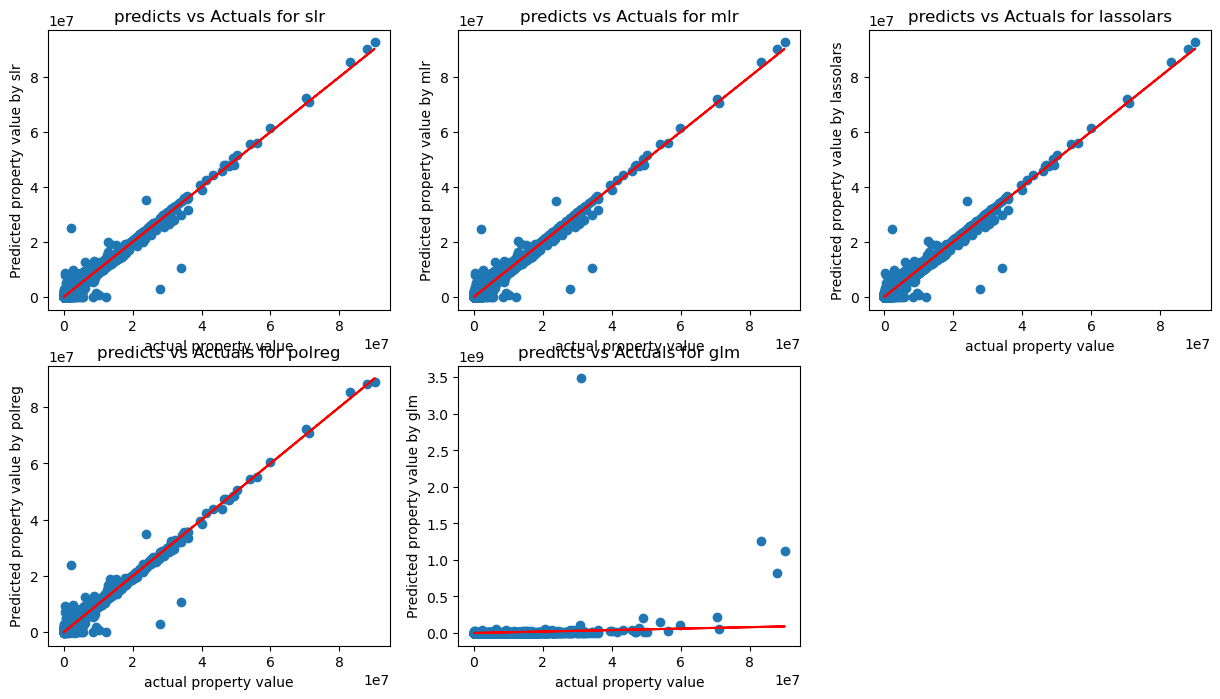

In [93]:
# using train
plt.figure(figsize=(15, 8))

# Plotting slr
plt.subplot(2,3,1)
plt.scatter(y_train, slr.predict(X_train_rfe), label='simple linear regression')
plt.title('predicts vs Actuals for slr')
plt.plot(y_train,y_train, ls='-', c='r') # line of best fit
plt.xlabel('actual property value')
plt.ylabel('Predicted property value by slr')

# Plotting mlr
plt.subplot(2,3,2)
plt.scatter(y_train, mlr.predict(X_train), label='multiple linear regression')
plt.title('predicts vs Actuals for mlr')
plt.plot(y_train,y_train, ls='-', c='r') # line of best fit
plt.xlabel('actual property value')
plt.ylabel('Predicted property value by mlr')

# Plotting lassolars
plt.subplot(2,3,3)
plt.scatter(y_train, lassolars.predict(X_train), label='lassolars')
plt.title('predicts vs Actuals for lassolars')
plt.plot(y_train,y_train, ls='-', c='r') # line of best fit
plt.xlabel('actual property value')
plt.ylabel('Predicted property value by lassolars')

# Plotting polreg
plt.subplot(2,3,4)
plt.scatter(y_train, polreg.predict(X_train_deg2), label='polreg')
plt.title('predicts vs Actuals for polreg')
plt.plot(y_train,y_train, ls='-', c='r') # line of best fit
plt.xlabel('actual property value')
plt.ylabel('Predicted property value by polreg')

# Plotting glm
plt.subplot(2,3,5)
plt.scatter(y_train, glm.predict(X_train), label='glm')
plt.title('predicts vs Actuals for glm')
plt.plot(y_train,y_train, ls='-', c='r') # line of best fit
plt.xlabel('actual property value')
plt.ylabel('Predicted property value by glm')


plt.show();


## 2. Plotting the errors in predictions

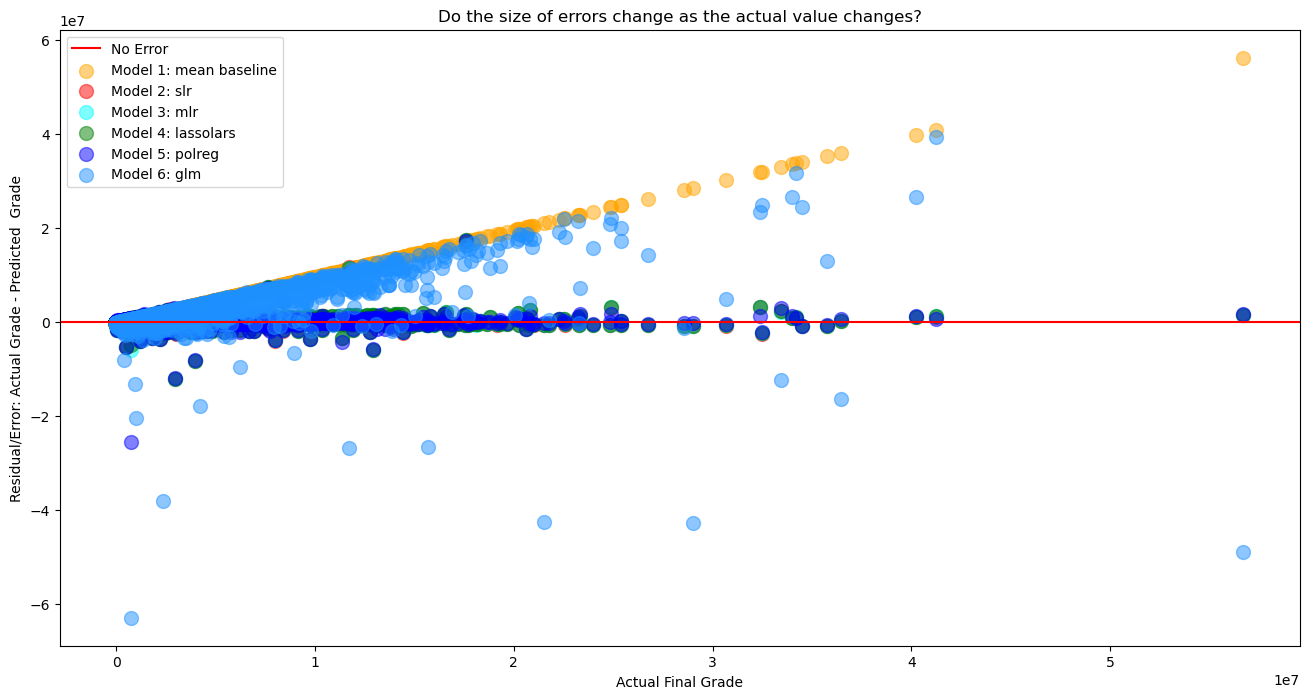

In [94]:
# y_validate
plt.figure(figsize=(16,8))
plt.axhline(c='red',label="No Error")

# for mean baseline
plt.scatter(y_validate_df.y_act,y_validate_df.y_act-y_validate_df.baseline_mean,
            alpha=.5, color="orange", s=100, label="Model 1: mean baseline")

# for simple linearRegression
plt.scatter(y_validate_df.y_act, y_validate_df.y_act-slr.predict(X_validate_rfe), 
            alpha=.5, color="red", s=100, label="Model 2: slr")

# for multiple linearRegression
plt.scatter(y_validate_df.y_act, y_validate_df.y_act-mlr.predict(X_validate), 
            alpha=.5, color="cyan", s=100, label="Model 3: mlr")

# for lassolars 
plt.scatter(y_validate_df.y_act, y_validate_df.y_act-lassolars.predict(X_validate), 
            alpha=.5, color="green", s=100, label="Model 4: lassolars")

# for polynomial of 2nd degree
plt.scatter(y_validate_df.y_act, y_validate_df.y_act-polreg.predict(X_validate_deg2), 
            alpha=.5, color="blue", s=100, label="Model 5: polreg")

# for generalised linear model 
plt.scatter(y_validate_df.y_act, y_validate_df.y_act-glm.predict(X_validate), 
            alpha=.5, color="dodgerblue", s=100, label="Model 6: glm")





plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Actual Grade - Predicted  Grade")
plt.title("Do the size of errors change as the actual value changes?")
#plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()



<div class='alert alert-block alert-info'>

## Based on the models tested, the best model is the LassoLars, where rmse = $87879.78803 and r2=0.982389 

## Hence,I will be using the <font color=purple>'LassoLars'</font> model on test.

</div>

# Test Dataset

In [95]:
rmse_test,r2_test=evaluate_model(y_test,lassolars.predict(X_test))
rmse_test,r2_test

(79460.91380736725, 0.9854491184980889)

In [96]:
print(f'With the LassoLars model: rmse on test sample is ${round(rmse_test,2)} and r2 is {round(r2_test,6)}')


With the LassoLars model: rmse on test sample is $79460.91 and r2 is 0.985449


In [97]:
rmse_baseline_train=round(evaluate_df.iloc[1]['rmse'],2)
rmse_baseline_train

662210.58

In [98]:
print(f'With the baseline model: rmse on train sample is ${rmse_baseline_train}')

With the baseline model: rmse on train sample is $662210.58


## Conclusion

With 'LassoLars' model: rmse on test sample is 79460.91 as opposed to rmse baseline 662210.58
Potential savings of $582749.67 (88%) on averge as opposed to baseline.
Hence, we construct the 'LassoLars' ML regression model that predicts property value of single family using attributes of the properties.